<a href="https://colab.research.google.com/github/arsiakh/Quantum-Password-Generator/blob/main/qRNG_Fall_Fest_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

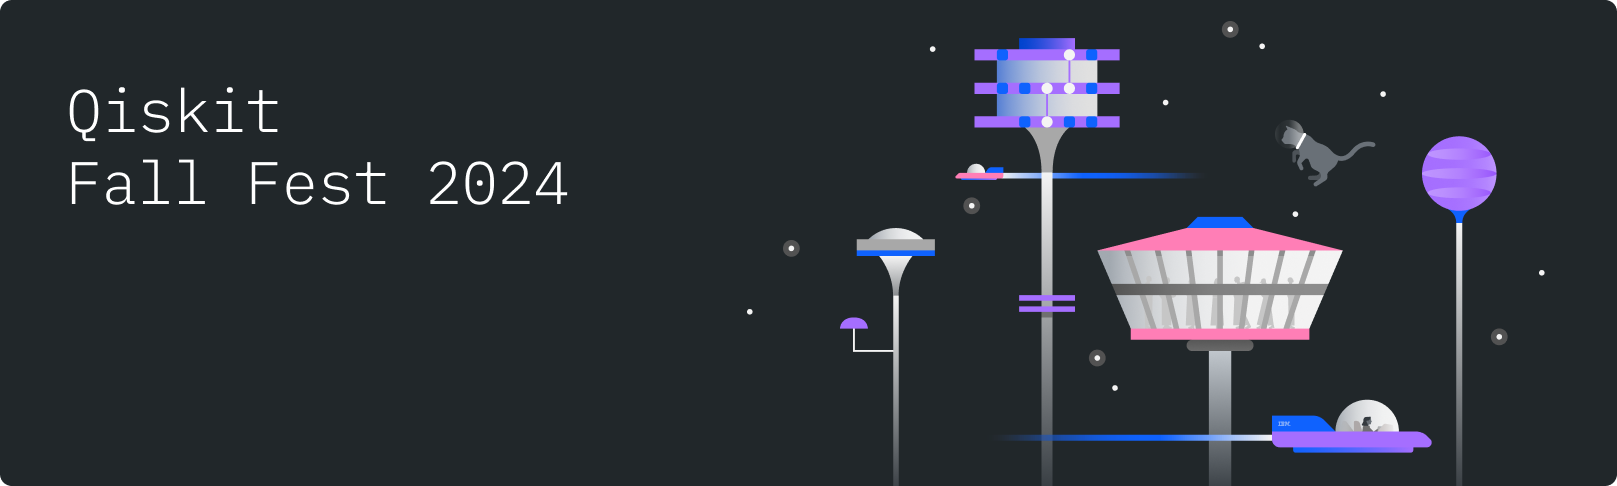

# $\color{#df83b5}{\text{Welcome to the Qiskit Fall Fest!}}$

Hi there and welcome to the **Qiskit Fall Fest**!

Whether you're a total beginner or a PhD candidate in quantum physics, there is something here for you. Thanks for joining us.  😀

The Qiskit Fall Fest is a massive event, featuring thousands of students worldwide who are all learning about quantum computing and Qiskit. Just by being here, you're helping to make history. Your participation is helping to shape what the future of the industry will look like. Congratulations and welcome!

# $\color{#6799db}{\text{Background and Motivation }}$

Did you know that random number generators are a valuable tool for computing? Real random number
generation is incredibly important for things like security and cryptography. However, all “random number generators” from classical computers aren’t really.... random.

**Your prompt is to create a truly random number generator using a quantum processor**

# $\color{#6799db}{\text{Getting started}}$

Your task is to create a random number generating circuit. You can decide on the number of qubits and possible outcomes, we’ll call this number n. Keep in mind that creating a superposition chain of more than 10 qubits can be quite tricky.

Utilizing H-gates, generate a quantum state with n number of equally possible outcomes. How many qubits are needed for this task? It may be helpful to think about how the quantum computational space scales with each additional qubit. Assign your numeric values to the possible states, so that the measured state of the qubits results in your program printing the associated value

# $\color{#6799db}{\text{Tips}}$

You will be able to decide how many times your quantum circuit is run by defining the number of “shots.” By running your circuit once, you can create the quantum state with n equally possible outcomes. By only measuring once, the first outcome to be measured will be your answer. However, this doesn’t fully demonstrate the fact that your qubits are in a quantum state of superposition. If you run it multiples times, you should get n equal buckets of measurement results, showing that each quantum state was equally likely to be measured. Now you can see the true quantum nature of your circuit, but you aren’t given a clear result for your random number generator. You can decide how many “shots” you want to run, and, if you run it more than once, how you want your program to then randomly choose the quantum state to generate a number.



# $\color{#6799db}{\text{Further Considerations}}$

As you run more and more “shots,” you might find that some numbers will be returned more often than others. This is a result of intrinsic noise in the quantum system. You could consider exploring ways to mitigate this noise to make this random number generator as “fair” as possible?

Random number generators don't serve much purpose in isolation. Can you find a creative way to apply your quantum random number generator?
Here are some ideas to get you thinking:
  1. A quantum fortune teller
  2. A monte carlo simulation
  3. Random pixel art

# $\color{#6799db}{\text{Resources}}$
[What is a qRNG?](https://quantumzeitgeist.com/what-is-a-quantum-random-number-generator/)

[A Beginner's Guide to Qiskit](https://medium.com/@harini.hapuarachchi/a-beginners-guide-to-qiskit-1-0-c8e3e854d732#:~:text=In%20Qiskit%2C%20a%20%E2%80%9Cfake%20backend,transpiler%20and%20other%20backend%20functionality.)

# $\color{#6799db}{\text{Start Coding}}$

Below is some code to install Qiskit within your current environment. The rest of your code can be added in cells below.



In [ ]:
### INSTALL QISKIT inside your cloud-based environment

%pip install qiskit[visualization]
%pip install qiskit_aer
%pip install qiskit_ibm_runtime
%pip install symengine==0.11.0
%pip install qiskit_algorithms


In [ ]:
### Import the required packages

# General
import numpy as np
from math import pi

# Qiskit imports
from qiskit import QuantumCircuit, transpile, assemble
from qiskit.circuit import Parameter
from qiskit.quantum_info import SparsePauliOp
from qiskit_aer import Aer, AerSimulator

# Qiskit Runtime imports
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import EstimatorV2 as Estimator
from qiskit_ibm_runtime import SamplerV2 as Sampler

# Plotting routines
import matplotlib.pyplot as plt
import matplotlib.ticker as tck

##simulation and visulization
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.visualization import plot_histogram

In [ ]:
## Save your IBM Quantum account and set it as your default account.
QiskitRuntimeService.save_account(

    channel="ibm_quantum",

    token="4552b881b427a115c5ae720ad686ce82b5ed731e3f98a9d0e95f211cdf66196243d3ca1309fd80a216e3afc2586ae3dc61d442504e163f354c8dbf38bc843a94",

    set_as_default=True,

    # Use `overwrite=True` if you're updating your token.
    overwrite=True,
)

# Load saved credentials
service = QiskitRuntimeService()

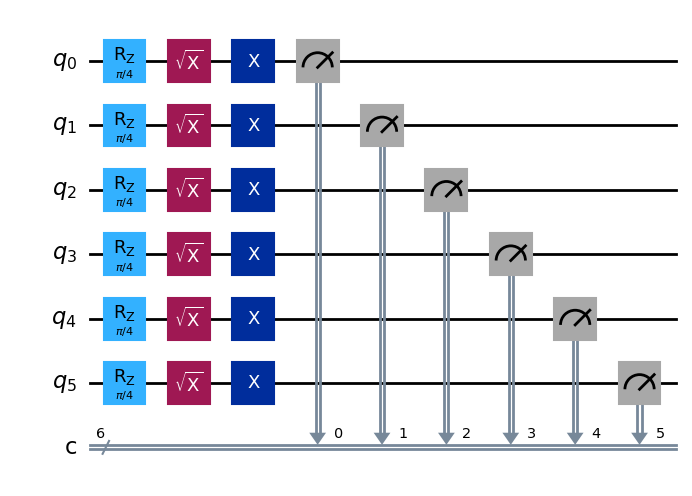

In [ ]:
## START CODING HERE

# -----------------------------------#
# Part 1: Create the quantum circuit #
# -----------------------------------#

# Define parameters for the random number generator
q = 6   #  umbe ro fqubits
shots = 1000  # Number of shots for distribution analysis

# Create a quantum circuit with q qubits and q classical bits
qc = QuantumCircuit(q, q)

# Apply gates to all qubits to create superposition
for qubit in range(q):
  qc.rz(pi / 4, qubit)
  qc.sx(qubit)
  qc.x(qubit)

# Measure all qubits
qc.measure(range(q), range(q))

# Draw the Circuit
qc.draw("mpl")

In [ ]:
# --------------------------------------------#
# Part 2: Retreive the random number results #
# --------------------------------------------#

# simulate the quantum circuit
def simulate(qc):
  simulator = AerSimulator()

  # Execute the quantum circuit on the simulator
  shots = 1000
  result = simulator.run(qc, shots=shots).result()

  # Get the counts
  counts = result.get_counts()
  return counts

# function to run the circuit on quantum hardware
# Did not get it to function
def run(qc, service):

  from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler

  service = QiskitRuntimeService()
  backend = service.least_busy(operational=True, simulator=False)

  sampler = Sampler(backend)
  job = sampler.run([qc])
  print(f"job id: {job.job_id()}")
  job_result = job.result()
  print(job_result)

counts = simulate(qc)
print(counts)

{'001101': 14, '011111': 16, '001001': 16, '101101': 22, '111101': 15, '001100': 17, '001000': 15, '010110': 21, '110110': 15, '100011': 15, '000011': 21, '110000': 14, '010000': 17, '100000': 16, '100110': 18, '111100': 15, '010111': 18, '010100': 15, '100101': 20, '101011': 16, '111110': 17, '011100': 18, '110010': 22, '010010': 10, '011010': 11, '011101': 20, '000001': 12, '010001': 9, '000110': 17, '101100': 14, '001111': 19, '101010': 10, '101110': 14, '110001': 22, '011011': 14, '000100': 14, '100111': 8, '011110': 19, '000000': 14, '101000': 17, '011001': 17, '010011': 14, '001110': 17, '111011': 17, '001011': 16, '011000': 13, '101001': 17, '101111': 20, '100001': 8, '010101': 16, '110100': 16, '000010': 13, '110101': 15, '100010': 15, '111000': 10, '000101': 15, '110011': 19, '000111': 16, '001010': 18, '111001': 13, '110111': 16, '111010': 12, '100100': 14, '111111': 16}


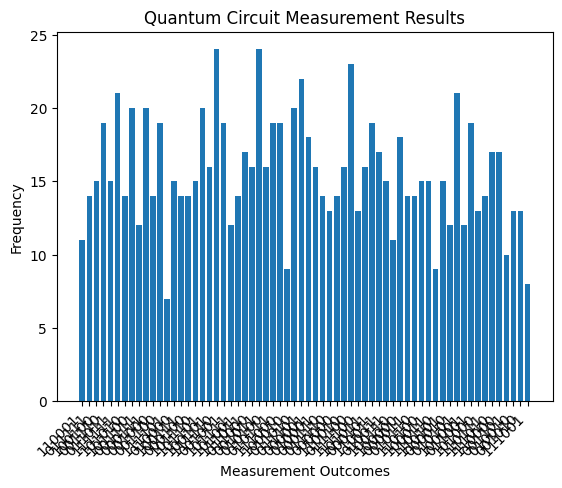

[62, 11, 28, 29, 63, 21, 44, 7, 45, 26, 14, 12]


In [ ]:
# --------------------------------------------#
# Part 3: Processes the random number results #
# --------------------------------------------#

# plotting part
outcomes = list(counts.keys())
frequencies = list(counts.values())

# Create the histogram
plt.bar(outcomes, frequencies)

# Add labels and title
plt.xlabel('Measurement Outcomes')
plt.ylabel('Frequency')
plt.title('Quantum Circuit Measurement Results')

# Show the plot
plt.xticks(rotation=45, ha='right')
plt.show()

# Sets the number of random numbers we want to output
numOfCharacters=12

# Variables needed for the random number extraction
keys = []
values = []
highestFrequency = 0

# Retreives the random numbers from the set of counts
for i in range(numOfCharacters):
    # Find the maximum value in the dictionary
    highestFrequency = max(counts.values())

    # Find all keys that have the highest value and store them in `keys` and `values`
    for key, value in list(counts.items()):
        if value == highestFrequency:
            keys.append(key)
            values.append(value)

    # Create a new dictionary that excludes the keys with the highest value
    new_counts = {}
    for k, v in counts.items():
        if v != highestFrequency:
            new_counts[k] = v

    # Update `counts` to the filtered dictionary
    counts = new_counts
    keys = keys[:numOfCharacters]
    values = values[:numOfCharacters]

# Converts each of the binary values into decimal numbers
decimal_numbers=[]
for num in keys:
  decimal_numbers.append(int(num,2))

print(decimal_numbers)

In [ ]:
# -------------------------------#
# Part 4: Create the Application #
# -------------------------------#

# creates a random password using the random number generator
password=''
for i in range(len(decimal_numbers)):
  password+= chr(decimal_numbers[i]+33)

print(password)

_,=>`6M(N;/-
